In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as hc
from sklearn.metrics.pairwise import cosine_similarity
import random

In [65]:
data = []
zfps = set()
with open('../data/enrich_kzfp_perSubfam/zfp_file_list.txt') as infile:
    for line in infile:
        zfp, filename = line.strip().split('\t')
        if zfp in zfps:
            continue
        df = pd.read_csv(f'../data/enrich_kzfp_perSubfam/{filename}', sep='\t')
        df['zfp'] = zfp
        data.append(df[['zfp'] + list(df.columns[:-1])])
        zfps.add(zfp)
zfp_df = pd.concat(data)
zfp_df['fraction_bound'] = 0
zfp_df.loc[zfp_df['padj.binomial'] <= 1e-02, 'fraction_bound'] = 1
zfp_df['fraction_bound'] *= zfp_df['te.count.with.peak']/zfp_df['te.total.n']
zfp_df.head(10)

,zfp,subfam_name,padj.hypergeom.reg,padj.hypergeom.alafisher,padj.binomial,te.count.with.peak,te.total.n,peak.count.on.te,total.peak.ov.te,total.peak.count,total.Mbp.te,avg.subfam.size,te.genome.ratio,peak.total.Mbp,peak.ratio.on.te,ratio.genome.peak,fraction_bound
0,HKR1,L1MC4,4.614620e-86,2.094480e-68,2.811890e-80,76,23685,90,434,533,8.012670,338,0.002595,0.321218,0.814259,0.000104,0.003209
1,HKR1,L1MC4a,7.087430e-26,1.361670e-19,1.415260e-24,26,9991,31,434,533,3.777980,378,0.001223,0.321218,0.814259,0.000104,0.002602
2,HKR1,SVA_C,6.128500e-03,1.422240e-01,3.619900e-02,0,486,3,434,533,0.486689,1001,0.000158,0.321218,0.814259,0.000104,0.000000
3,HKR1,LTR1E,8.242240e-02,5.661440e-01,1.683250e-01,2,282,2,434,533,0.198408,703,0.000064,0.321218,0.814259,0.000104,0.000000
4,HKR1,SVA_D,7.378550e-02,1.000000e+00,9.106610e-01,0,1433,3,434,533,1.786820,1246,0.000579,0.321218,0.814259,0.000104,0.000000
5,HKR1,MLT1G-int,3.544240e-02,1.000000e+00,1.000000e+00,0,165,1,434,533,0.128050,776,0.000041,0.321218,0.814259,0.000104,0.000000
6,HKR1,Charlie18a,1.000000e+00,1.000000e+00,1.000000e+00,2,2463,2,434,533,0.409201,166,0.000133,0.321218,0.814259,0.000104,0.000000
7,HKR1,Charlie13b,1.000000e+00,1.000000e+00,1.000000e+00,1,404,1,434,533,0.083520,206,0.000027,0.321218,0.814259,0.000104,0.000000
8,HKR1,MLT2B1,7.806790e-01,1.000000e+00,1.000000e+00,2,3644,2,434,533,1.290170,354,0.000418,0.321218,0.814259,0.000104,0.000000
9,HKR1,MER90,1.000000e+00,1.000000e+00,1.000000e+00,1,697,1,434,533,0.223250,320,0.000072,0.321218,0.814259,0.000104,0.000000


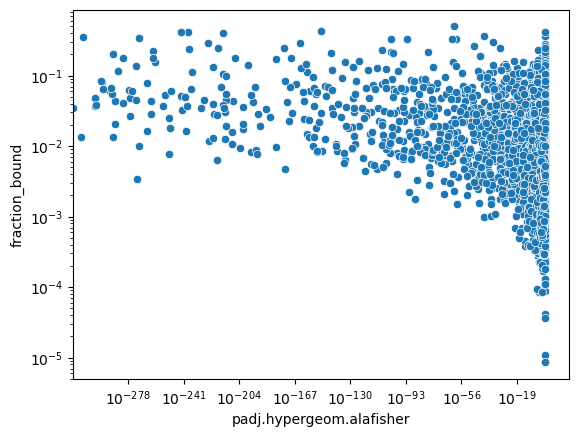

In [71]:
fig, ax = plt.subplots()
sns.scatterplot(data=zfp_df, x='padj.hypergeom.alafisher', y='fraction_bound')
ax.set_yscale('log')
ax.set_xscale('log')

<AxesSubplot:xlabel='subfam_name', ylabel='zfp'>

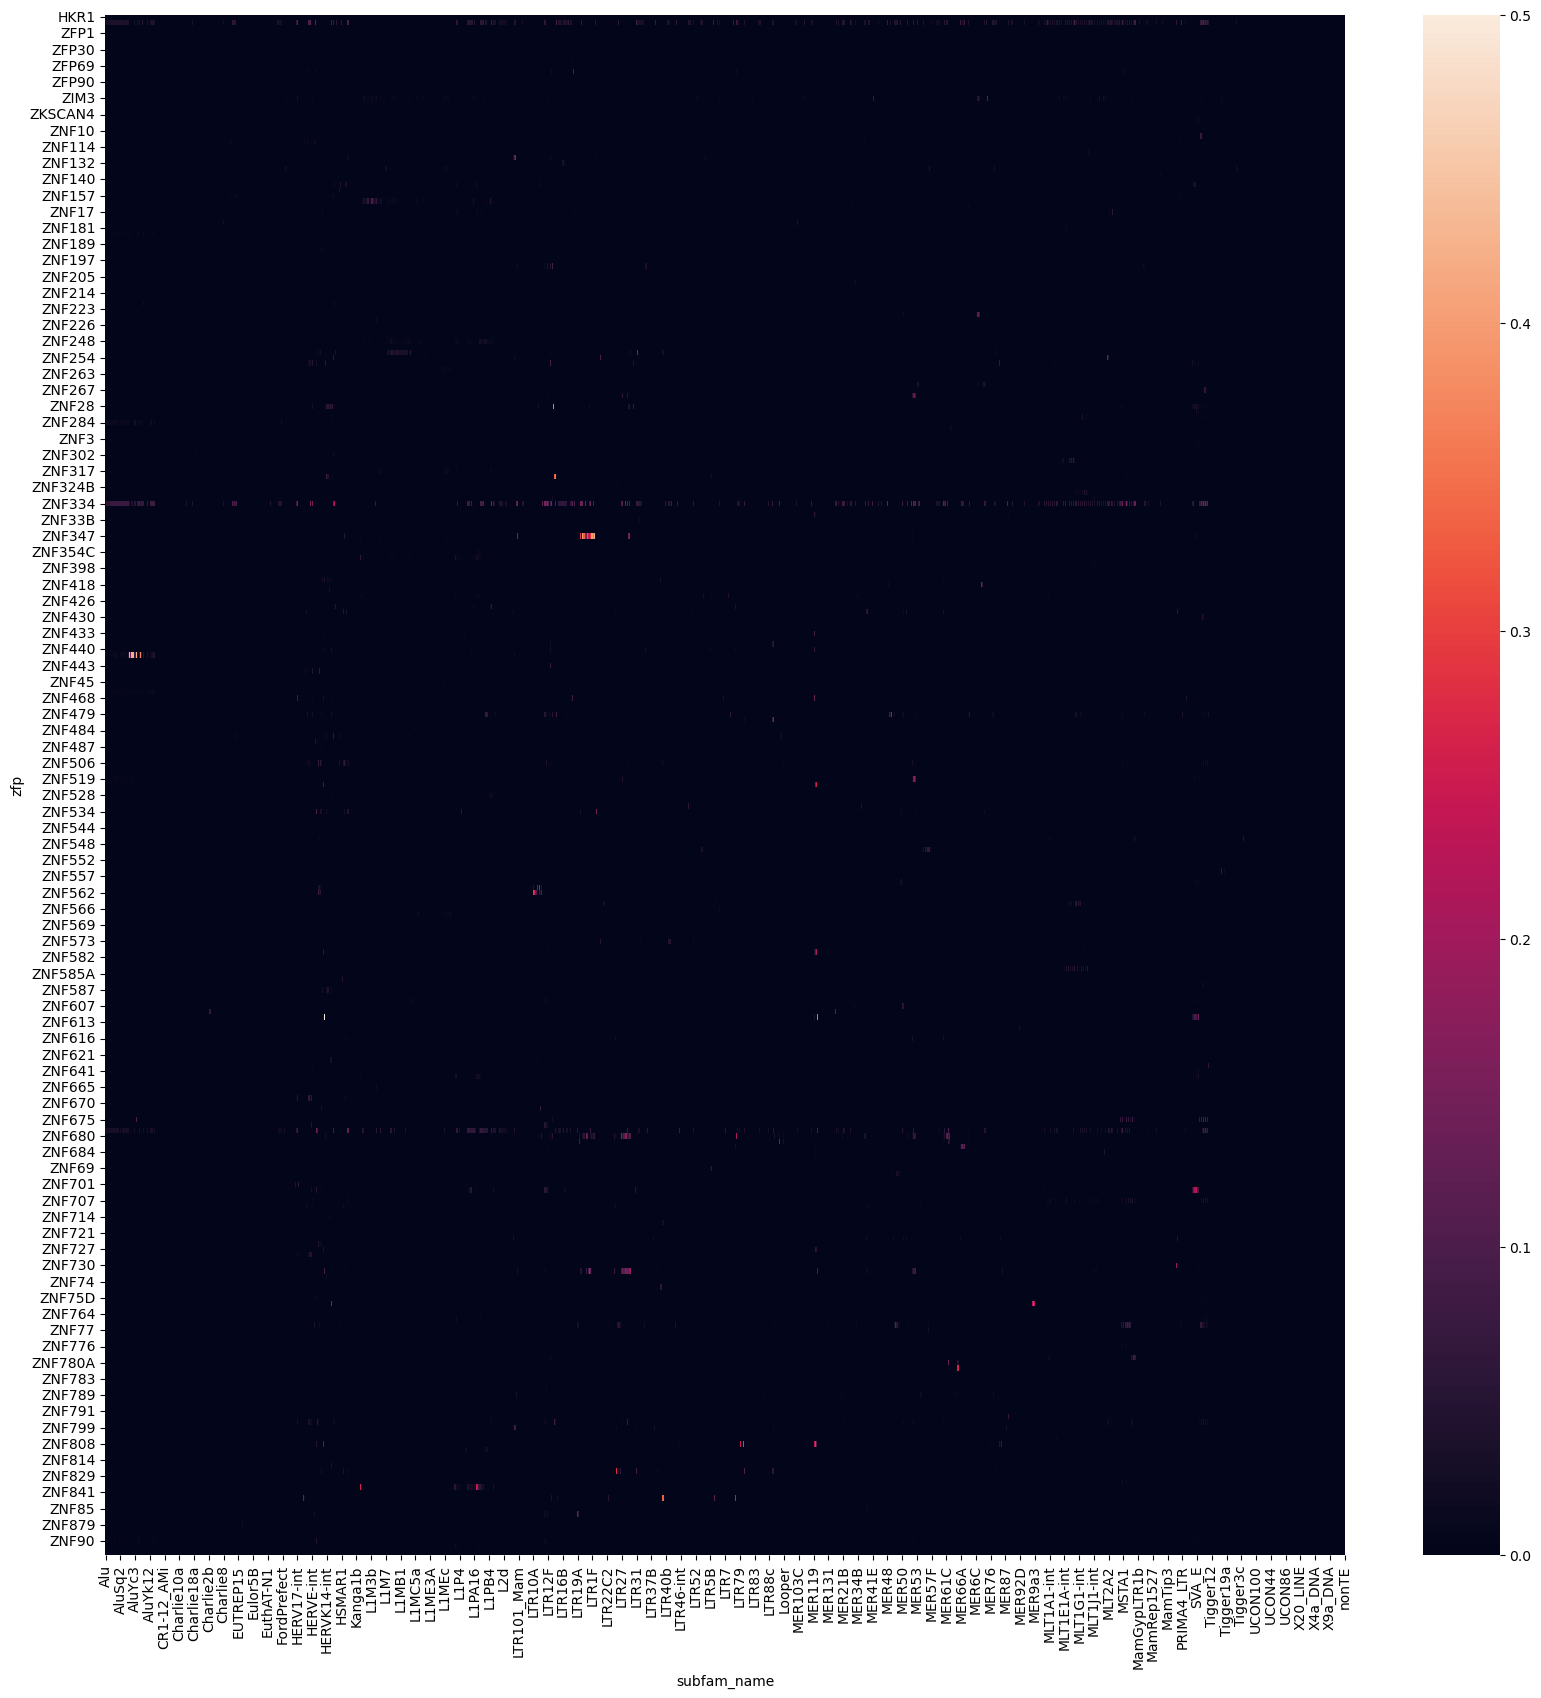

In [72]:
fig = plt.figure(figsize=(20, 20))
zfp_mat = zfp_df.pivot(index='zfp', columns='subfam_name', values='fraction_bound')
sns.heatmap(zfp_mat)

<Figure size 2000x2000 with 0 Axes>

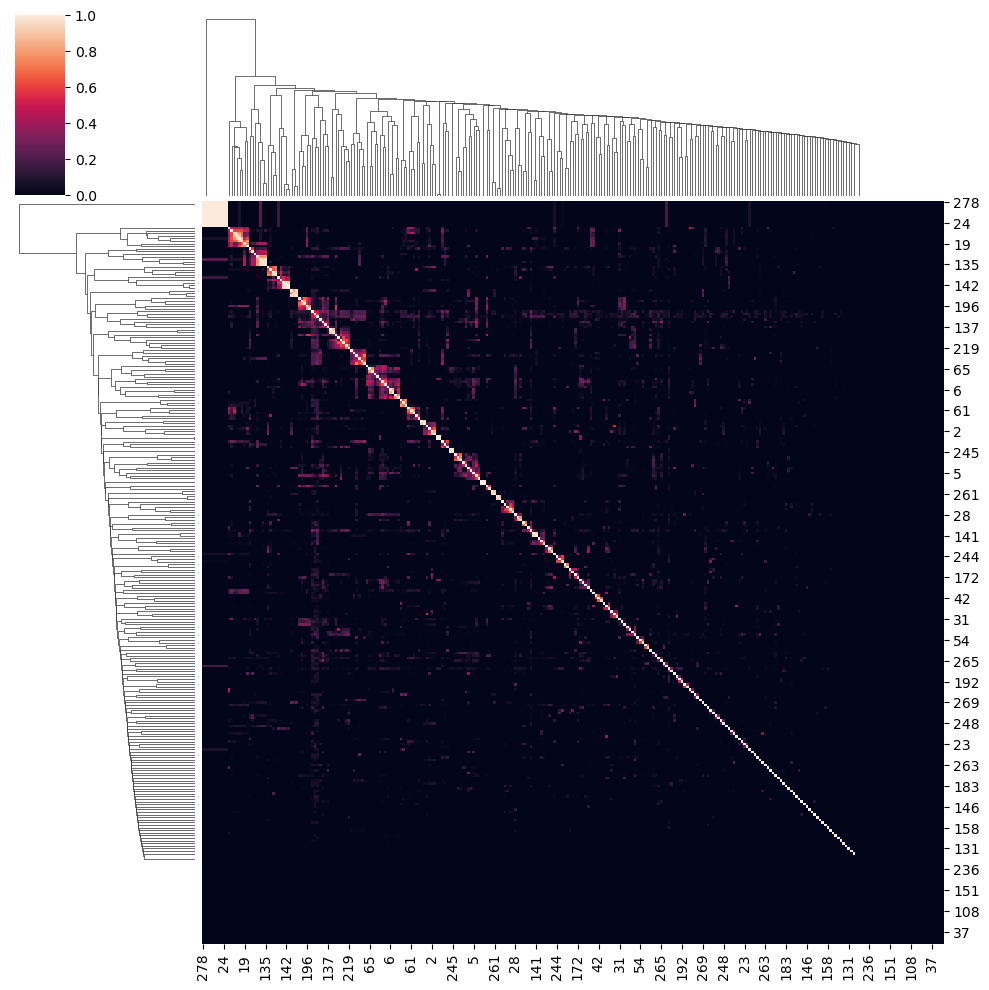

In [73]:
# idx = zfp_mat.index.to_list()
# random.shuffle(idx)
# col = zfp_mat.columns.to_list()
# random.shuffle(col)

zfp_zfp_mat = cosine_similarity(zfp_mat)
linkage = hc.linkage(zfp_zfp_mat, method='average')
fig = plt.figure(figsize=(20, 20))
sns.clustermap(data=zfp_zfp_mat, row_linkage=linkage, col_linkage=linkage)

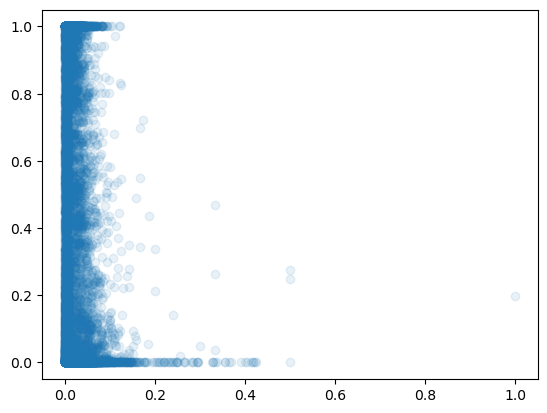

In [74]:
fig, ax = plt.subplots()
plt.scatter(zfp_df['te.count.with.peak']/zfp_df['te.total.n'], zfp_df['padj.binomial'], alpha=0.1)